In [1]:
%pip install numpy

Defaulting to user installation because normal site-packages is not writeable
     |████████████████████████████████| 17.3 MB 15.5 MB/s eta 0:00:01
You should consider upgrading via the '/usr/local/bin/python3 -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


In [1]:
# Check if participants did multiple attempts in different settings (which should not happen).

import json
import glob, os
from itertools import combinations

USER_STUDIES_DIR = "/home/shared/vlm_rationales_eval/user_studies_data/"
settings = [
    'showbothmetrics_llava1.5_with_image_q20_i10_s0',
    'prodmetric_llava1.5_with_image_q20_i10_s0',
    'vf_numeric_llava1.5_with_image_q20_i10_s0',
    'contr_numeric_llava1.5_with_image_q20_i10_s0',
    'avg_vf_contr_numeric_llava1.5_with_image_q20_i10_s0',
    'showbothmetrics_descriptive_llava1.5_with_image_q20_i10_s0',
]

# Dictionary to hold the set of user_ids for each setting.
settings_user_ids = {}

for setting in settings:
    print(f"Processing setting: {setting}")
    pattern = os.path.join(USER_STUDIES_DIR, "prolific_batches", "batch_interaction_data", setting, "*.json")
    files = glob.glob(pattern)
    user_ids = set()
    
    for file in files:
        with open(file) as f:
            batch_data = json.load(f)
            # Add all user_ids from the current JSON file.
            user_ids.update(batch_data.keys())
    
    settings_user_ids[setting] = user_ids
    print(f"{len(user_ids)} participants in {setting}")

# Compare overlaps between each pair of settings.
print("\nOverlap between settings:")
for s1, s2 in combinations(settings, 2):
    overlap = settings_user_ids[s1].intersection(settings_user_ids[s2])
    print(f"Overlap between {s1} and {s2}: {len(overlap)} participants")
    if len(overlap) > 0:
        print(f"Participants: {overlap}")


Processing setting: showbothmetrics_llava1.5_with_image_q20_i10_s0


30 participants in showbothmetrics_llava1.5_with_image_q20_i10_s0
Processing setting: prodmetric_llava1.5_with_image_q20_i10_s0
31 participants in prodmetric_llava1.5_with_image_q20_i10_s0
Processing setting: vf_numeric_llava1.5_with_image_q20_i10_s0
28 participants in vf_numeric_llava1.5_with_image_q20_i10_s0
Processing setting: contr_numeric_llava1.5_with_image_q20_i10_s0
30 participants in contr_numeric_llava1.5_with_image_q20_i10_s0
Processing setting: avg_vf_contr_numeric_llava1.5_with_image_q20_i10_s0
31 participants in avg_vf_contr_numeric_llava1.5_with_image_q20_i10_s0
Processing setting: showbothmetrics_descriptive_llava1.5_with_image_q20_i10_s0
26 participants in showbothmetrics_descriptive_llava1.5_with_image_q20_i10_s0

Overlap between settings:
Overlap between showbothmetrics_llava1.5_with_image_q20_i10_s0 and prodmetric_llava1.5_with_image_q20_i10_s0: 0 participants
Overlap between showbothmetrics_llava1.5_with_image_q20_i10_s0 and vf_numeric_llava1.5_with_image_q20_i10_s

In [2]:
# Check if participants did multiple attempts in the same settings (which there should be some, but that is fine)

import json
import glob, os
from collections import Counter

USER_STUDIES_DIR = "/home/shared/vlm_rationales_eval/user_studies_data/"
settings = [
    'showbothmetrics_llava1.5_with_image_q20_i10_s0',
    'prodmetric_llava1.5_with_image_q20_i10_s0',
    'vf_numeric_llava1.5_with_image_q20_i10_s0',
    'contr_numeric_llava1.5_with_image_q20_i10_s0',
    'avg_vf_contr_numeric_llava1.5_with_image_q20_i10_s0',
    'showbothmetrics_descriptive_llava1.5_with_image_q20_i10_s0',
]

for setting in settings:
    print(f"Processing setting: {setting}")
    pattern = os.path.join(USER_STUDIES_DIR, "prolific_batches", "batch_interaction_data", setting, "*.json")
    files = glob.glob(pattern)
    attempts_counter = Counter()
    
    for file in files:
        with open(file) as f:
            batch_data = json.load(f)
            # Update counter with all user_ids in the file.
            attempts_counter.update(batch_data.keys())
    
    total_attempts = sum(attempts_counter.values())
    unique_participants = len(attempts_counter)
    print(f"Total attempts in {setting}: {total_attempts}")
    print(f"Unique participants in {setting}: {unique_participants}")
    
    # Identify users with more than one attempt.
    multiple_attempts = {user: count for user, count in attempts_counter.items() if count > 1}
    if multiple_attempts:
        print(f"In setting {setting}, the following participants did multiple attempts: {multiple_attempts}")
    else:
        print(f"In setting {setting}, no participant did multiple attempts.")
    print("-" * 50)


Processing setting: showbothmetrics_llava1.5_with_image_q20_i10_s0
Total attempts in showbothmetrics_llava1.5_with_image_q20_i10_s0: 31
Unique participants in showbothmetrics_llava1.5_with_image_q20_i10_s0: 30
In setting showbothmetrics_llava1.5_with_image_q20_i10_s0, the following participants did multiple attempts: {'58d9a79c33fef3000118abdf': 2}
--------------------------------------------------
Processing setting: prodmetric_llava1.5_with_image_q20_i10_s0
Total attempts in prodmetric_llava1.5_with_image_q20_i10_s0: 31
Unique participants in prodmetric_llava1.5_with_image_q20_i10_s0: 31
In setting prodmetric_llava1.5_with_image_q20_i10_s0, no participant did multiple attempts.
--------------------------------------------------
Processing setting: vf_numeric_llava1.5_with_image_q20_i10_s0
Total attempts in vf_numeric_llava1.5_with_image_q20_i10_s0: 30
Unique participants in vf_numeric_llava1.5_with_image_q20_i10_s0: 28
In setting vf_numeric_llava1.5_with_image_q20_i10_s0, the followi

In [3]:
import json
import numpy as np
import glob, os

USER_STUDIES_DIR = "/home/shared/vlm_rationales_eval/user_studies_data/"

setting = settings[-1]
print(f"Setting: {setting}")
files = glob.glob(f'{USER_STUDIES_DIR}/prolific_batches/batch_interaction_data/{setting}/*.json')
data = {}
for file in files:
    with open(file) as f:
        batch_data = json.load(f)
        for user_id, session in batch_data.items():
            if user_id in data:
                data[user_id].append(session)  # Append to list instead of overwriting
            else:
                data[user_id] = [session]  # Initialize as list

print(f"{sum(len(sessions) for sessions in data.values())} total sessions loaded from {len(files)} files")
all_instances = sum([session['interactions'] for sessions in data.values() for session in sessions], [])
print(len(all_instances))

Setting: showbothmetrics_descriptive_llava1.5_with_image_q20_i10_s0
29 total sessions loaded from 10 files
290


In [11]:
# Evaluate the interactions
from collections import Counter
import math

def compute_margin(p, n):
    return math.sqrt(p*(1-p)/n) if n > 0 else 0

def compute_proportion_ci(p, n):
    margin = compute_margin(p, n)
    return (p - margin, p + margin)

def compute_mean_std(values):
    n = len(values)
    mean_val = np.mean(values)
    std_val = np.std(values, ddof=1)
    se = std_val/np.sqrt(n) if n > 0 else 0
    return (mean_val - se, mean_val + se)

def evaluate_answers(stage, instances):
    ground_truths = np.array([1-x['question']['prediction_is_correct'] for x in instances])       # 0 means AI is correct, 1 means AI is incorrect
    preds = np.array([x['user_selections'][stage] for x in instances])
    true_positives = np.sum(np.logical_and(preds == 0, ground_truths == 0))
    false_positives = np.sum(np.logical_and(preds == 0, ground_truths == 1))
    true_negatives = np.sum(np.logical_and(preds == 1, ground_truths == 1))
    false_negatives = np.sum(np.logical_and(preds == 1, ground_truths == 0))

    unsure_rate = np.mean(preds == 2)
    accuracy = (true_positives + true_negatives) / (true_positives + false_positives + true_negatives + false_negatives)
    total_accuracy = (true_positives + true_negatives) / len(ground_truths)
    precision = true_positives / (true_positives + false_positives) if true_positives + false_positives > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if true_positives + false_negatives > 0 else 0
    false_positive_rate = false_positives / (false_positives + true_negatives) if false_positives + true_negatives > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if precision + recall > 0 else 0

    # Utility: 0 if user is unsure, 1 if user correctly predicts AI correctness, -1 if user incorrectly predicts AI correctness
    individual_utilities = np.array([0 if preds[i] == 2 else 1-2*np.abs(preds[i] - ground_truths[i]) for i in range(len(preds))])
    utility = np.mean(individual_utilities)
    
    # Compute 95% CIs.
    total_accuracy_ci = compute_proportion_ci(total_accuracy, len(ground_truths))
    unsure_rate_ci    = compute_proportion_ci(unsure_rate, len(preds))
    
    non_unsure = preds != 2
    non_unsure_n = np.sum(non_unsure)
    accuracy_ci = compute_proportion_ci(accuracy, non_unsure_n) if non_unsure_n > 0 else (0, 0)
    
    precision_n = true_positives + false_positives
    precision_ci = compute_proportion_ci(precision, precision_n) if precision_n > 0 else (0, 0)
    
    recall_n = true_positives + false_negatives
    recall_ci = compute_proportion_ci(recall, recall_n) if recall_n > 0 else (0, 0)
    
    fpr_n = false_positives + true_negatives
    fpr_ci = compute_proportion_ci(false_positive_rate, fpr_n) if fpr_n > 0 else (0, 0)
    
    utility_ci = compute_mean_std(individual_utilities)

    return {
        'total_accuracy': total_accuracy,
        'total_accuracy_ci': total_accuracy_ci,
        'accuracy': accuracy,
        'accuracy_ci': accuracy_ci,
        'precision': precision,
        'precision_ci': precision_ci,
        'recall': recall,
        'recall_ci': recall_ci,
        'false_positive_rate': false_positive_rate,
        'fpr_ci': fpr_ci,
        'f1': f1,
        'unsure_rate': unsure_rate,
        'unsure_rate_ci': unsure_rate_ci,
        'utility': utility,
        'utility_ci': utility_ci,
        'preds': preds,
        'ground_truths': ground_truths,
        'individual_utilities': individual_utilities,
    }

answeronly_results = evaluate_answers('answeronly', all_instances)
withexplanation_results = evaluate_answers('withexplanation', all_instances)
withexplanationquality_results = evaluate_answers('withexplanationquality', all_instances)

# print("Stage                   \tUnsure Rate\tTotalAcc\tNotUnsureAcc\tPrecision\tRecall\t\tF1\t\tFPR\t\tUtility")
# print("-"*140)
# for stage, results in zip(
#     ['Answer Only', 'With Explanation', 'With Explanation + Quality'], 
#     [answeronly_results, withexplanation_results, withexplanationquality_results]
# ):
#     print(f"{stage:<25}\t{results['unsure_rate']:.1%}\t\t{results['total_accuracy']:.1%}\t\t{results['accuracy']:.1%}\t\t{results['precision']:.3f}\t\t{results['recall']:.3f}\t\t{results['f1']:.3f}\t\t{results['false_positive_rate']:.3f}\t\t{results['utility']:.3f}")
    
# print("Stage                   \tUnsure Rate\tTotalAcc\tNotUnsureAcc\tPrecision\tRecall\t\tF1\tFPR\t\tUtility")
print("Stage                   \tUnsure Rate\tTotalAcc\tNotUnsureAcc\tUtility")
# print("-"*150) 
print("-"*100)
results_for_easy_copy = []
for stage_name, results in zip(
    ['Answer Only', 'With Explanation', 'With Explanation + Quality'], 
    [answeronly_results, withexplanation_results, withexplanationquality_results]
):
    # Calculate margins as half the width of each CI.
    unsure_margin    = (results['unsure_rate_ci'][1] - results['unsure_rate_ci'][0]) / 2
    total_acc_margin = (results['total_accuracy_ci'][1] - results['total_accuracy_ci'][0]) / 2
    acc_margin       = (results['accuracy_ci'][1] - results['accuracy_ci'][0]) / 2
    prec_margin      = (results['precision_ci'][1] - results['precision_ci'][0]) / 2 if results['precision_ci'] != (0, 0) else 0
    recall_margin    = (results['recall_ci'][1] - results['recall_ci'][0]) / 2 if results['recall_ci'] != (0, 0) else 0
    fpr_margin       = (results['fpr_ci'][1] - results['fpr_ci'][0]) / 2 if results['fpr_ci'] != (0, 0) else 0
    utility_margin   = (results['utility_ci'][1] - results['utility_ci'][0]) / 2

    # For proportion metrics, we print as percentages; f1 is printed as a decimal (CI not computed); utility remains as a number.
    print(f"{stage_name:<25}\t"
          f"{results['unsure_rate']:.1%} ± {unsure_margin:.1%}\t"
          f"{results['total_accuracy']:.1%} ± {total_acc_margin:.1%}\t"
          f"{results['accuracy']:.1%} ± {acc_margin:.1%}\t"
        #   f"{results['precision']:.1%} ± {prec_margin:.1%}\t"
        #   f"{results['recall']:.1%} ± {recall_margin:.1%}\t"
        #   f"{results['f1']:.3f}\t"
        #   f"{results['false_positive_rate']:.1%} ± {fpr_margin:.1%}\t"
          f"{results['utility']:.3f} ± {utility_margin:.3f}")
    
    copyable_result = f"{results['unsure_rate']:.1%} ± {unsure_margin:.1%}, "
    copyable_result += f"{results['total_accuracy']:.1%} ± {total_acc_margin:.1%}, "
    copyable_result += f"{results['accuracy']:.1%} ± {acc_margin:.1%}, "
    copyable_result += f"{results['utility']:.3f} ± {utility_margin:.3f}"
    
    results_for_easy_copy.append(copyable_result)
    


Stage                   	Unsure Rate	TotalAcc	NotUnsureAcc	Utility
----------------------------------------------------------------------------------------------------
Answer Only              	67.2% ± 2.8%	16.2% ± 2.2%	49.5% ± 5.1%	-0.003 ± 0.034
With Explanation         	23.1% ± 2.5%	44.5% ± 2.9%	57.8% ± 3.3%	0.121 ± 0.051
With Explanation + Quality	7.2% ± 1.5%	59.7% ± 2.9%	64.3% ± 2.9%	0.266 ± 0.054


In [6]:
# Print the results in a format that can be easily copied.
print("Results for easy copy:")
for result in results_for_easy_copy:
    print(result)

Results for easy copy:
67.2% ± 5.4%, 16.2% ± 4.2%, 49.5% ± 10.1%, -0.003 ± 0.066
23.1% ± 4.9%, 44.5% ± 5.7%, 57.8% ± 6.5%, 0.121 ± 0.100
7.2% ± 3.0%, 59.7% ± 5.6%, 64.3% ± 5.7%, 0.266 ± 0.107


In [15]:
import json
import glob, os
import numpy as np
import math

# Definitions of helper functions.
def compute_margin(p, n):
    return 1.96 * math.sqrt(p * (1 - p) / n) if n > 0 else 0

def compute_proportion_ci(p, n):
    margin = compute_margin(p, n)
    return (p - margin, p + margin)

def compute_mean_ci(values):
    n = len(values)
    mean_val = np.mean(values)
    std_val = np.std(values, ddof=1)
    se = std_val / np.sqrt(n) if n > 0 else 0
    return (mean_val - 1.96 * se, mean_val + 1.96 * se)

def evaluate_answers(stage, instances):
    ground_truths = np.array([1 - x['question']['prediction_is_correct'] for x in instances])
    preds = np.array([x['user_selections'][stage] for x in instances])
    true_positives = np.sum(np.logical_and(preds == 0, ground_truths == 0))
    false_positives = np.sum(np.logical_and(preds == 0, ground_truths == 1))
    true_negatives = np.sum(np.logical_and(preds == 1, ground_truths == 1))
    false_negatives = np.sum(np.logical_and(preds == 1, ground_truths == 0))
    
    unsure_rate = np.mean(preds == 2)
    accuracy = (true_positives + true_negatives) / (true_positives + false_positives + true_negatives + false_negatives)
    total_accuracy = (true_positives + true_negatives) / len(ground_truths)
    precision = true_positives / (true_positives + false_positives) if (true_positives + false_positives) > 0 else 0
    recall = true_positives / (true_positives + false_negatives) if (true_positives + false_negatives) > 0 else 0
    false_positive_rate = false_positives / (false_positives + true_negatives) if (false_positives + true_negatives) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    # Utility: 0 if unsure; 1 if correct; -1 if incorrect.
    individual_utilities = np.array([
        0 if preds[i] == 2 else 1 - 2 * abs(preds[i] - ground_truths[i])
        for i in range(len(preds))
    ])
    utility = np.mean(individual_utilities)
    
    total_accuracy_ci = compute_proportion_ci(total_accuracy, len(ground_truths))
    unsure_rate_ci    = compute_proportion_ci(unsure_rate, len(preds))
    
    non_unsure = preds != 2
    non_unsure_n = np.sum(non_unsure)
    accuracy_ci = compute_proportion_ci(accuracy, non_unsure_n) if non_unsure_n > 0 else (0, 0)
    
    precision_n = true_positives + false_positives
    precision_ci = compute_proportion_ci(precision, precision_n) if precision_n > 0 else (0, 0)
    
    recall_n = true_positives + false_negatives
    recall_ci = compute_proportion_ci(recall, recall_n) if recall_n > 0 else (0, 0)
    
    fpr_n = false_positives + true_negatives
    fpr_ci = compute_proportion_ci(false_positive_rate, fpr_n) if fpr_n > 0 else (0, 0)
    
    utility_ci = compute_mean_ci(individual_utilities)

    return {
        'total_accuracy': total_accuracy,
        'total_accuracy_ci': total_accuracy_ci,
        'accuracy': accuracy,
        'accuracy_ci': accuracy_ci,
        'precision': precision,
        'precision_ci': precision_ci,
        'recall': recall,
        'recall_ci': recall_ci,
        'false_positive_rate': false_positive_rate,
        'fpr_ci': fpr_ci,
        'f1': f1,
        'unsure_rate': unsure_rate,
        'unsure_rate_ci': unsure_rate_ci,
        'utility': utility,
        'utility_ci': utility_ci,
        'preds': preds,
        'ground_truths': ground_truths,
        'individual_utilities': individual_utilities,
    }

def compute_unsure_rate(interactions, stage):
    preds = np.array([x['user_selections'][stage] for x in interactions])
    return np.mean(preds == 2)

# List of settings.
settings = [
    'showbothmetrics_llava1.5_with_image_q20_i10_s0',
    'prodmetric_llava1.5_with_image_q20_i10_s0',
    'vf_numeric_llava1.5_with_image_q20_i10_s0',
    'contr_numeric_llava1.5_with_image_q20_i10_s0',
    'avg_vf_contr_numeric_llava1.5_with_image_q20_i10_s0',
    'showbothmetrics_descriptive_llava1.5_with_image_q20_i10_s0',
]

USER_STUDIES_DIR = "/home/shared/vlm_rationales_eval/user_studies_data/"

# Process each setting individually.
for setting in settings:
    print(f"\nProcessing setting: {setting}")
    pattern = os.path.join(USER_STUDIES_DIR, "prolific_batches", "batch_interaction_data", setting, "*.json")
    files = glob.glob(pattern)
    
    # Aggregate sessions by user.
    data = {}  # key: user_id, value: list of sessions (each session is a dict)
    for file in files:
        with open(file) as f:
            batch_data = json.load(f)
            for user_id, session in batch_data.items():
                data.setdefault(user_id, []).append(session)
    total_users = len(data)
    total_attempts = sum(len(sessions) for sessions in data.values())
    print(f"Found {total_users} users in setting '{setting}' with {total_attempts} total attempts.")
    
    # Filter: Only include users with >=20% unsure rate in step 1.
    filtered_instances = []
    count_filtered_users = 0
    count_filtered_attempts = 0
    for user, sessions in data.items():
        interactions = []
        for session in sessions:
            interactions.extend(session['interactions'])
        rate_ans = compute_unsure_rate(interactions, 'answeronly')
        if rate_ans >= 0.20:
            filtered_instances.extend(interactions)
            count_filtered_users += 1
            count_filtered_attempts += len(sessions)
    
    print(f"{count_filtered_users} users remain after filtering for >=20% unsure rate in step 1, with {count_filtered_attempts} attempts.")
    
    if len(filtered_instances) == 0:
        print("No interactions remain after filtering. Skipping evaluation for this setting.")
        continue

    # Evaluate the filtered interactions for each stage.
    answeronly_results = evaluate_answers('answeronly', filtered_instances)
    withexplanation_results = evaluate_answers('withexplanation', filtered_instances)
    withexplanationquality_results = evaluate_answers('withexplanationquality', filtered_instances)
    
    # Print the formatted table.
    print("Stage                   \tUnsure Rate\tTotalAcc\tNotUnsureAcc\tUtility")
    print("-" * 100)
    for stage_name, results in zip(
        ['Answer Only', 'With Explanation', 'With Explanation + Quality'],
        [answeronly_results, withexplanation_results, withexplanationquality_results]
    ):
        unsure_margin    = (results['unsure_rate_ci'][1] - results['unsure_rate_ci'][0]) / 2
        total_acc_margin = (results['total_accuracy_ci'][1] - results['total_accuracy_ci'][0]) / 2
        acc_margin       = (results['accuracy_ci'][1] - results['accuracy_ci'][0]) / 2
        utility_margin   = (results['utility_ci'][1] - results['utility_ci'][0]) / 2

        print(f"{stage_name:<25}\t"
              f"{results['unsure_rate']:.1%} ± {unsure_margin:.1%}\t"
              f"{results['total_accuracy']:.1%} ± {total_acc_margin:.1%}\t"
              f"{results['accuracy']:.1%} ± {acc_margin:.1%}\t"
              f"{results['utility']:.3f} ± {utility_margin:.3f}")
    
    # Print CSV-friendly copyable results
    result_strs = []
    for results in [answeronly_results, withexplanation_results, withexplanationquality_results]:
        unsure_margin    = (results['unsure_rate_ci'][1] - results['unsure_rate_ci'][0]) / 2
        total_acc_margin = (results['total_accuracy_ci'][1] - results['total_accuracy_ci'][0]) / 2
        acc_margin       = (results['accuracy_ci'][1] - results['accuracy_ci'][0]) / 2
        utility_margin   = (results['utility_ci'][1] - results['utility_ci'][0]) / 2

        s = (f"{results['unsure_rate']:.1%} ± {unsure_margin:.1%}, "
            f"{results['total_accuracy']:.1%} ± {total_acc_margin:.1%}, "
            f"{results['accuracy']:.1%} ± {acc_margin:.1%}, "
            f"{results['utility']:.3f} ± {utility_margin:.3f}")
        result_strs.append(s)

    print(", ".join(result_strs))



Processing setting: showbothmetrics_llava1.5_with_image_q20_i10_s0
Found 30 users in setting 'showbothmetrics_llava1.5_with_image_q20_i10_s0' with 31 total attempts.
26 users remain after filtering for >=20% unsure rate in step 1, with 27 attempts.
Stage                   	Unsure Rate	TotalAcc	NotUnsureAcc	Utility
----------------------------------------------------------------------------------------------------
Answer Only              	81.5% ± 4.6%	11.5% ± 3.8%	62.0% ± 13.5%	0.044 ± 0.051
With Explanation         	37.4% ± 5.8%	34.8% ± 5.7%	55.6% ± 7.5%	0.070 ± 0.094
With Explanation + Quality	11.1% ± 3.7%	58.1% ± 5.9%	65.4% ± 6.0%	0.274 ± 0.108
81.5% ± 4.6%, 11.5% ± 3.8%, 62.0% ± 13.5%, 0.044 ± 0.051, 37.4% ± 5.8%, 34.8% ± 5.7%, 55.6% ± 7.5%, 0.070 ± 0.094, 11.1% ± 3.7%, 58.1% ± 5.9%, 65.4% ± 6.0%, 0.274 ± 0.108

Processing setting: prodmetric_llava1.5_with_image_q20_i10_s0
Found 31 users in setting 'prodmetric_llava1.5_with_image_q20_i10_s0' with 31 total attempts.
28 users remain

Aggregated 182 sessions from 175 users across 6 settings.
Computed metrics for 175 users.


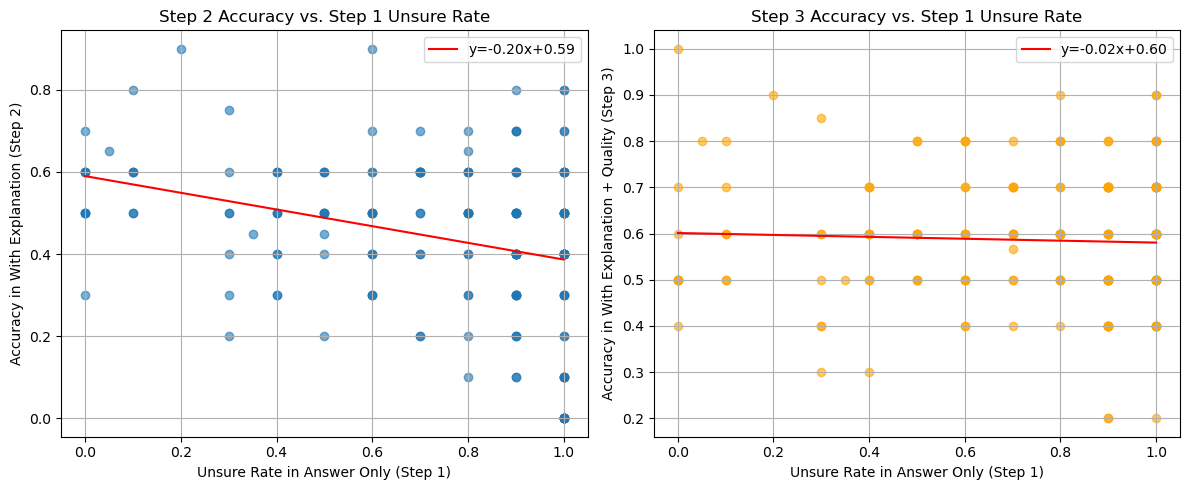

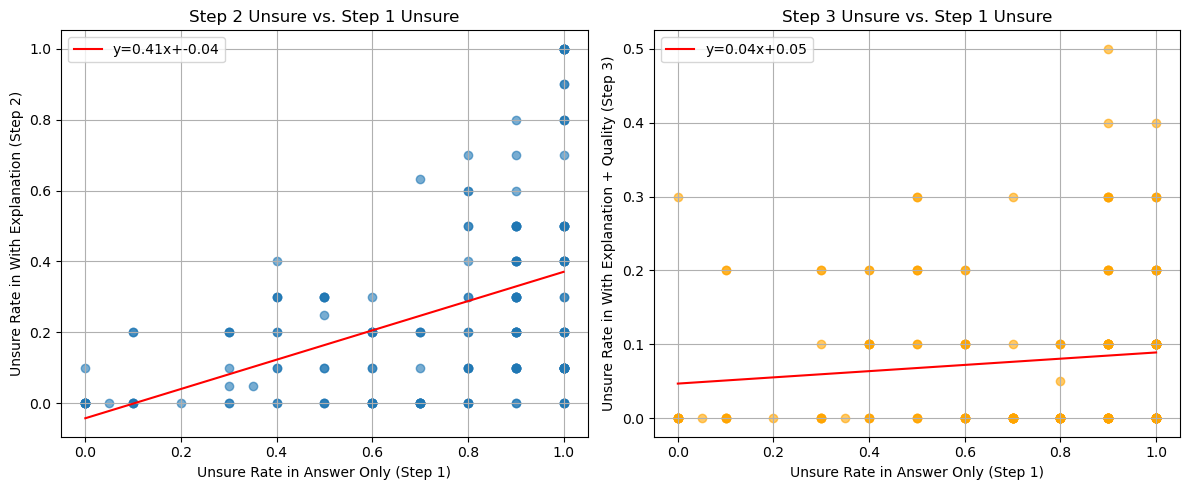

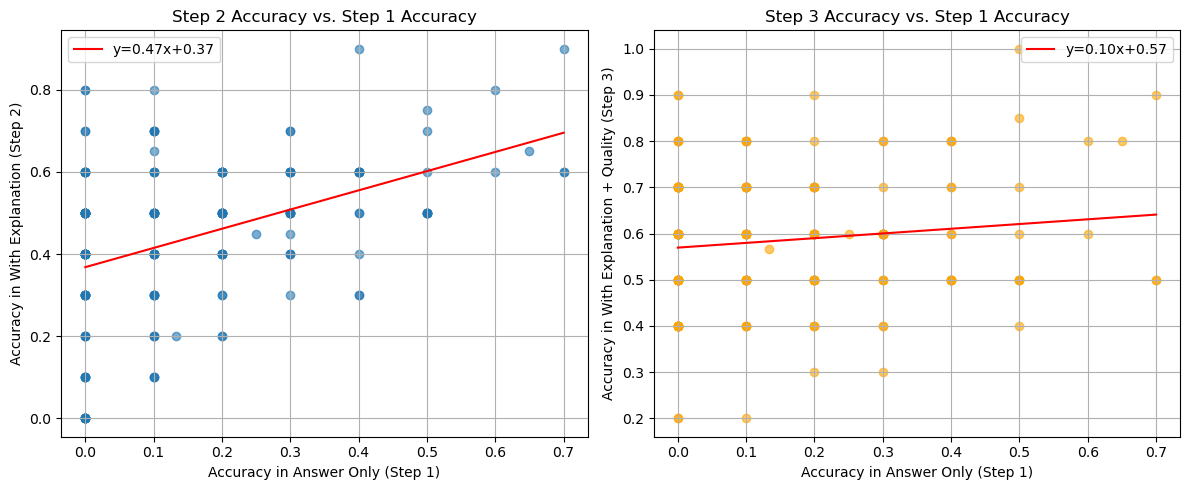

In [1]:
import json
import numpy as np
import glob, os
import matplotlib.pyplot as plt

# List of settings.
settings = [
    'showbothmetrics_llava1.5_with_image_q20_i10_s0',
    'prodmetric_llava1.5_with_image_q20_i10_s0',
    'vf_numeric_llava1.5_with_image_q20_i10_s0',
    'contr_numeric_llava1.5_with_image_q20_i10_s0',
    'avg_vf_contr_numeric_llava1.5_with_image_q20_i10_s0',
    'showbothmetrics_descriptive_llava1.5_with_image_q20_i10_s0',
]

USER_STUDIES_DIR = "/home/shared/vlm_rationales_eval/user_studies_data/"

# Aggregate sessions across all settings by user.
aggregated_data = {}  # key: user_id, value: list of sessions
for setting in settings:
    pattern = os.path.join(USER_STUDIES_DIR, "prolific_batches", "batch_interaction_data", setting, "*.json")
    files = glob.glob(pattern)
    for file in files:
        with open(file) as f:
            batch_data = json.load(f)
            for user_id, session in batch_data.items():
                aggregated_data.setdefault(user_id, []).append(session)

total_sessions = sum(len(sessions) for sessions in aggregated_data.values())
print(f"Aggregated {total_sessions} sessions from {len(aggregated_data)} users across {len(settings)} settings.")

# Helper: compute unsure rate for a given stage.
def compute_unsure_rate(interactions, stage):
    preds = np.array([x['user_selections'][stage] for x in interactions])
    return np.mean(preds == 2)

# Helper: compute accuracy for a given stage.
# Every response is counted; if the user is "unsure" (i.e. selection == 2) it is considered incorrect.
def compute_user_accuracy_for_stage(interactions, stage):
    preds = np.array([x['user_selections'][stage] for x in interactions])
    # Ground truth: 0 means AI is correct, 1 means AI is incorrect.
    ground_truths = np.array([1 - x['question']['prediction_is_correct'] for x in interactions])
    # A response is correct if it is not 'unsure' and matches the ground truth.
    is_correct = ((preds == 0) & (ground_truths == 0)) | ((preds == 1) & (ground_truths == 1))
    accuracy = np.mean(is_correct)
    return accuracy

# Dictionaries to store per-user metrics.
unsure_rate_answeronly = {}           # Stage 1: 'answeronly'
unsure_rate_withexplanation = {}       # Stage 2: 'withexplanation'
unsure_rate_withexplanationquality = {} # Stage 3: 'withexplanationquality'
accuracy_answeronly = {}
accuracy_withexplanation = {}
accuracy_withexplanationquality = {}

# Compute per-user metrics by aggregating interactions across sessions.
for user, sessions in aggregated_data.items():
    interactions = []
    for session in sessions:
        interactions.extend(session['interactions'])
    # Compute unsure rates.
    rate_ans = compute_unsure_rate(interactions, 'answeronly')
    rate_expl = compute_unsure_rate(interactions, 'withexplanation')
    rate_explqual = compute_unsure_rate(interactions, 'withexplanationquality')
    # Compute accuracies.
    acc_ans = compute_user_accuracy_for_stage(interactions, 'answeronly')
    acc_expl = compute_user_accuracy_for_stage(interactions, 'withexplanation')
    acc_explqual = compute_user_accuracy_for_stage(interactions, 'withexplanationquality')
    # Only record users where all metrics are computed.
    if acc_ans is not None and acc_expl is not None and acc_explqual is not None:
        unsure_rate_answeronly[user] = rate_ans
        unsure_rate_withexplanation[user] = rate_expl
        unsure_rate_withexplanationquality[user] = rate_explqual
        accuracy_answeronly[user] = acc_ans
        accuracy_withexplanation[user] = acc_expl
        accuracy_withexplanationquality[user] = acc_explqual

print(f"Computed metrics for {len(unsure_rate_answeronly)} users.")

### Figure 1: Original Unsure (Step 1) vs. Accuracy (Step 2/3) ###

# Prepare data for Step 2.
users_common_step2 = [user for user in unsure_rate_answeronly if user in accuracy_withexplanation]
x_unsure = np.array([unsure_rate_answeronly[user] for user in users_common_step2])
y_acc_step2 = np.array([accuracy_withexplanation[user] for user in users_common_step2])

# Prepare data for Step 3.
users_common_step3 = [user for user in unsure_rate_answeronly if user in accuracy_withexplanationquality]
x_unsure_3 = np.array([unsure_rate_answeronly[user] for user in users_common_step3])
y_acc_step3 = np.array([accuracy_withexplanationquality[user] for user in users_common_step3])

plt.figure(figsize=(12, 5))

# Subplot: Step 1 Unsure vs. Step 2 Accuracy.
plt.subplot(1, 2, 1)
plt.scatter(x_unsure, y_acc_step2, alpha=0.6)
# Best-fit line.
slope, intercept = np.polyfit(x_unsure, y_acc_step2, 1)
x_line = np.linspace(x_unsure.min(), x_unsure.max(), 100)
plt.plot(x_line, slope * x_line + intercept, color='red', label=f'y={slope:.2f}x+{intercept:.2f}')
plt.xlabel("Unsure Rate in Answer Only (Step 1)")
plt.ylabel("Accuracy in With Explanation (Step 2)")
plt.title("Step 2 Accuracy vs. Step 1 Unsure Rate")
plt.legend()
plt.grid(True)

# Subplot: Step 1 Unsure vs. Step 3 Accuracy.
plt.subplot(1, 2, 2)
plt.scatter(x_unsure_3, y_acc_step3, alpha=0.6, color='orange')
# Best-fit line.
slope3, intercept3 = np.polyfit(x_unsure_3, y_acc_step3, 1)
x_line3 = np.linspace(x_unsure_3.min(), x_unsure_3.max(), 100)
plt.plot(x_line3, slope3 * x_line3 + intercept3, color='red', label=f'y={slope3:.2f}x+{intercept3:.2f}')
plt.xlabel("Unsure Rate in Answer Only (Step 1)")
plt.ylabel("Accuracy in With Explanation + Quality (Step 3)")
plt.title("Step 3 Accuracy vs. Step 1 Unsure Rate")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Figure 2: Unsure Rate vs. Unsure Rate ###

# For Unsure vs Unsure, we compare:
# - Step 1 Unsure vs. Step 2 Unsure
# - Step 1 Unsure vs. Step 3 Unsure

# Prepare data for Step 2.
users_common_unsure2 = [user for user in unsure_rate_answeronly if user in unsure_rate_withexplanation]
x_unsure_rate = np.array([unsure_rate_answeronly[user] for user in users_common_unsure2])
y_unsure_rate_step2 = np.array([unsure_rate_withexplanation[user] for user in users_common_unsure2])

# Prepare data for Step 3.
users_common_unsure3 = [user for user in unsure_rate_answeronly if user in unsure_rate_withexplanationquality]
x_unsure_rate_3 = np.array([unsure_rate_answeronly[user] for user in users_common_unsure3])
y_unsure_rate_step3 = np.array([unsure_rate_withexplanationquality[user] for user in users_common_unsure3])

plt.figure(figsize=(12, 5))

# Subplot: Step 1 Unsure vs. Step 2 Unsure.
plt.subplot(1, 2, 1)
plt.scatter(x_unsure_rate, y_unsure_rate_step2, alpha=0.6)
slope_u2, intercept_u2 = np.polyfit(x_unsure_rate, y_unsure_rate_step2, 1)
x_line_u2 = np.linspace(x_unsure_rate.min(), x_unsure_rate.max(), 100)
plt.plot(x_line_u2, slope_u2 * x_line_u2 + intercept_u2, color='red', label=f'y={slope_u2:.2f}x+{intercept_u2:.2f}')
plt.xlabel("Unsure Rate in Answer Only (Step 1)")
plt.ylabel("Unsure Rate in With Explanation (Step 2)")
plt.title("Step 2 Unsure vs. Step 1 Unsure")
plt.legend()
plt.grid(True)

# Subplot: Step 1 Unsure vs. Step 3 Unsure.
plt.subplot(1, 2, 2)
plt.scatter(x_unsure_rate_3, y_unsure_rate_step3, alpha=0.6, color='orange')
slope_u3, intercept_u3 = np.polyfit(x_unsure_rate_3, y_unsure_rate_step3, 1)
x_line_u3 = np.linspace(x_unsure_rate_3.min(), x_unsure_rate_3.max(), 100)
plt.plot(x_line_u3, slope_u3 * x_line_u3 + intercept_u3, color='red', label=f'y={slope_u3:.2f}x+{intercept_u3:.2f}')
plt.xlabel("Unsure Rate in Answer Only (Step 1)")
plt.ylabel("Unsure Rate in With Explanation + Quality (Step 3)")
plt.title("Step 3 Unsure vs. Step 1 Unsure")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

### Figure 3: Accuracy vs. Accuracy ###

# For Accuracy vs Accuracy, we compare:
# - Step 1 Accuracy vs. Step 2 Accuracy
# - Step 1 Accuracy vs. Step 3 Accuracy

# Prepare data for Step 2.
users_common_acc2 = [user for user in accuracy_answeronly if user in accuracy_withexplanation]
x_acc = np.array([accuracy_answeronly[user] for user in users_common_acc2])
y_acc_step2_only = np.array([accuracy_withexplanation[user] for user in users_common_acc2])

# Prepare data for Step 3.
users_common_acc3 = [user for user in accuracy_answeronly if user in accuracy_withexplanationquality]
x_acc_3 = np.array([accuracy_answeronly[user] for user in users_common_acc3])
y_acc_step3_only = np.array([accuracy_withexplanationquality[user] for user in users_common_acc3])

plt.figure(figsize=(12, 5))

# Subplot: Step 1 Accuracy vs. Step 2 Accuracy.
plt.subplot(1, 2, 1)
plt.scatter(x_acc, y_acc_step2_only, alpha=0.6)
slope_a2, intercept_a2 = np.polyfit(x_acc, y_acc_step2_only, 1)
x_line_a2 = np.linspace(x_acc.min(), x_acc.max(), 100)
plt.plot(x_line_a2, slope_a2 * x_line_a2 + intercept_a2, color='red', label=f'y={slope_a2:.2f}x+{intercept_a2:.2f}')
plt.xlabel("Accuracy in Answer Only (Step 1)")
plt.ylabel("Accuracy in With Explanation (Step 2)")
plt.title("Step 2 Accuracy vs. Step 1 Accuracy")
plt.legend()
plt.grid(True)

# Subplot: Step 1 Accuracy vs. Step 3 Accuracy.
plt.subplot(1, 2, 2)
plt.scatter(x_acc_3, y_acc_step3_only, alpha=0.6, color='orange')
slope_a3, intercept_a3 = np.polyfit(x_acc_3, y_acc_step3_only, 1)
x_line_a3 = np.linspace(x_acc_3.min(), x_acc_3.max(), 100)
plt.plot(x_line_a3, slope_a3 * x_line_a3 + intercept_a3, color='red', label=f'y={slope_a3:.2f}x+{intercept_a3:.2f}')
plt.xlabel("Accuracy in Answer Only (Step 1)")
plt.ylabel("Accuracy in With Explanation + Quality (Step 3)")
plt.title("Step 3 Accuracy vs. Step 1 Accuracy")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


In [1]:
import json
import numpy as np
import glob, os
import pandas as pd
import matplotlib.pyplot as plt

# List of settings.
settings = [
    'showbothmetrics_llava1.5_with_image_q20_i10_s0',
    'vf_numeric_llava1.5_with_image_q20_i10_s0',
    'contr_numeric_llava1.5_with_image_q20_i10_s0',
    'avg_vf_contr_numeric_llava1.5_with_image_q20_i10_s0',
    'showbothmetrics_descriptive_llava1.5_with_image_q20_i10_s0',
]

USER_STUDIES_DIR = "/home/shared/vlm_rationales_eval/user_studies_data/"

# Define the stages.
stages = ['answeronly', 'withexplanation', 'withexplanationquality']

# Create a list to hold all records.
records = []

# Loop over each setting and load the JSON files.
for setting in settings:
    pattern = os.path.join(USER_STUDIES_DIR, "prolific_batches", "batch_interaction_data", setting, "*.json")
    files = glob.glob(pattern)
    for file in files:
        with open(file) as f:
            batch_data = json.load(f)
            # Each JSON file contains sessions keyed by user_id.
            for user_id, session in batch_data.items():
                interactions = session.get('interactions', [])
                # Loop over each question in the batch.
                for q_idx, interaction in enumerate(interactions):
                    # For each stage in the question, record the user selection.
                    for stage in stages:
                        selection = interaction.get('user_selections', {}).get(stage, None)
                        if selection is not None:
                            records.append({
                                "setting": setting,
                                "user_id": user_id,
                                "question_idx": q_idx + 1,  # Use 1-index for question numbers.
                                "stage": stage,
                                "selection": selection,
                                "is_unsure": 1 if selection == 2 else 0
                            })

# Convert the list of records into a pandas DataFrame.
df = pd.DataFrame(records)
print("DataFrame shape:", df.shape)
df

DataFrame shape: (4530, 6)


,setting,user_id,question_idx,stage,selection,is_unsure
0,showbothmetrics_llava1.5_with_image_q20_i10_s0,6658d3384552a75abbc15f10,1,answeronly,0,0
1,showbothmetrics_llava1.5_with_image_q20_i10_s0,6658d3384552a75abbc15f10,1,withexplanation,0,0
2,showbothmetrics_llava1.5_with_image_q20_i10_s0,6658d3384552a75abbc15f10,1,withexplanationquality,0,0
3,showbothmetrics_llava1.5_with_image_q20_i10_s0,6658d3384552a75abbc15f10,2,answeronly,0,0
4,showbothmetrics_llava1.5_with_image_q20_i10_s0,6658d3384552a75abbc15f10,2,withexplanation,0,0
...,...,...,...,...,...,...
4525,showbothmetrics_descriptive_llava1.5_with_imag...,6637b21240220c2517fffa1a,9,withexplanation,0,0
4526,showbothmetrics_descriptive_llava1.5_with_imag...,6637b21240220c2517fffa1a,9,withexplanationquality,0,0
4527,showbothmetrics_descriptive_llava1.5_with_imag...,6637b21240220c2517fffa1a,10,answeronly,2,1
4528,showbothmetrics_descriptive_llava1.5_with_imag...,6637b21240220c2517fffa1a,10,withexplanation,0,0


In [7]:
# Aggregate sessions across all settings by user.
aggregated_data = {}  # key: user_id, value: list of sessions
for setting in settings:
    pattern = os.path.join(USER_STUDIES_DIR, "prolific_batches", "batch_interaction_data", setting, "*.json")
    files = glob.glob(pattern)
    for file in files:
        with open(file) as f:
            batch_data = json.load(f)
            for user_id, session in batch_data.items():
                # Record the setting in the session so we know which task the session belongs to.
                session['setting'] = setting
                aggregated_data.setdefault(user_id, []).append(session)
print("\nUsers with <20% unsure rate in Answer Only (Step 1):")
for user, sessions in aggregated_data.items():
    # Collect all interactions and settings for this user.
    interactions = []
    user_settings = set()
    for session in sessions:
        interactions.extend(session['interactions'])
        user_settings.add(session['setting'])
    # Compute unsure rate and accuracy for Step 1.
    rate_ans = compute_unsure_rate(interactions, 'answeronly')
    acc_step3 = compute_user_accuracy_for_stage(interactions, 'withexplanationquality')

    
    if rate_ans < 0.2:
        print(f"User ID: {user}")
        print(f"  Unsure Rate (Step 1): {rate_ans:.2f}")
        print(f"  Accuracy (Step 3): {acc_step3:.2f}")
        print(f"  Settings: {list(user_settings)}\n")



Users with <20% unsure rate in Answer Only (Step 1):
User ID: 6658d3384552a75abbc15f10
  Unsure Rate (Step 1): 0.00
  Accuracy (Step 3): 0.40
  Settings: ['showbothmetrics_llava1.5_with_image_q20_i10_s0']

User ID: 639618dc4a68e64c6956c39c
  Unsure Rate (Step 1): 0.10
  Accuracy (Step 3): 0.70
  Settings: ['showbothmetrics_llava1.5_with_image_q20_i10_s0']

User ID: 6172ba772342dcc9343a29db
  Unsure Rate (Step 1): 0.00
  Accuracy (Step 3): 0.60
  Settings: ['showbothmetrics_llava1.5_with_image_q20_i10_s0']

User ID: 64503cd10c8d8b8241b5dce6
  Unsure Rate (Step 1): 0.00
  Accuracy (Step 3): 0.50
  Settings: ['showbothmetrics_llava1.5_with_image_q20_i10_s0']

User ID: 6637a9ce90f75e510910a42d
  Unsure Rate (Step 1): 0.00
  Accuracy (Step 3): 0.50
  Settings: ['prodmetric_llava1.5_with_image_q20_i10_s0']

User ID: 662fb42cc3458e96dee33181
  Unsure Rate (Step 1): 0.10
  Accuracy (Step 3): 0.50
  Settings: ['prodmetric_llava1.5_with_image_q20_i10_s0']

User ID: 60fdf6b3117c2aeb33f2dd99
  Un

In [5]:
df[20:40]

NameError: name 'df' is not defined


Grouped average unsure rates (first few rows):
                                             setting       stage  \
0  avg_vf_contr_numeric_llava1.5_with_image_q20_i...  answeronly   
1  avg_vf_contr_numeric_llava1.5_with_image_q20_i...  answeronly   
2  avg_vf_contr_numeric_llava1.5_with_image_q20_i...  answeronly   
3  avg_vf_contr_numeric_llava1.5_with_image_q20_i...  answeronly   
4  avg_vf_contr_numeric_llava1.5_with_image_q20_i...  answeronly   

   question_idx  is_unsure  unsure_rate_percent  
0             1   0.741935            74.193548  
1             2   0.903226            90.322581  
2             3   0.806452            80.645161  
3             4   0.838710            83.870968  
4             5   0.838710            83.870968  


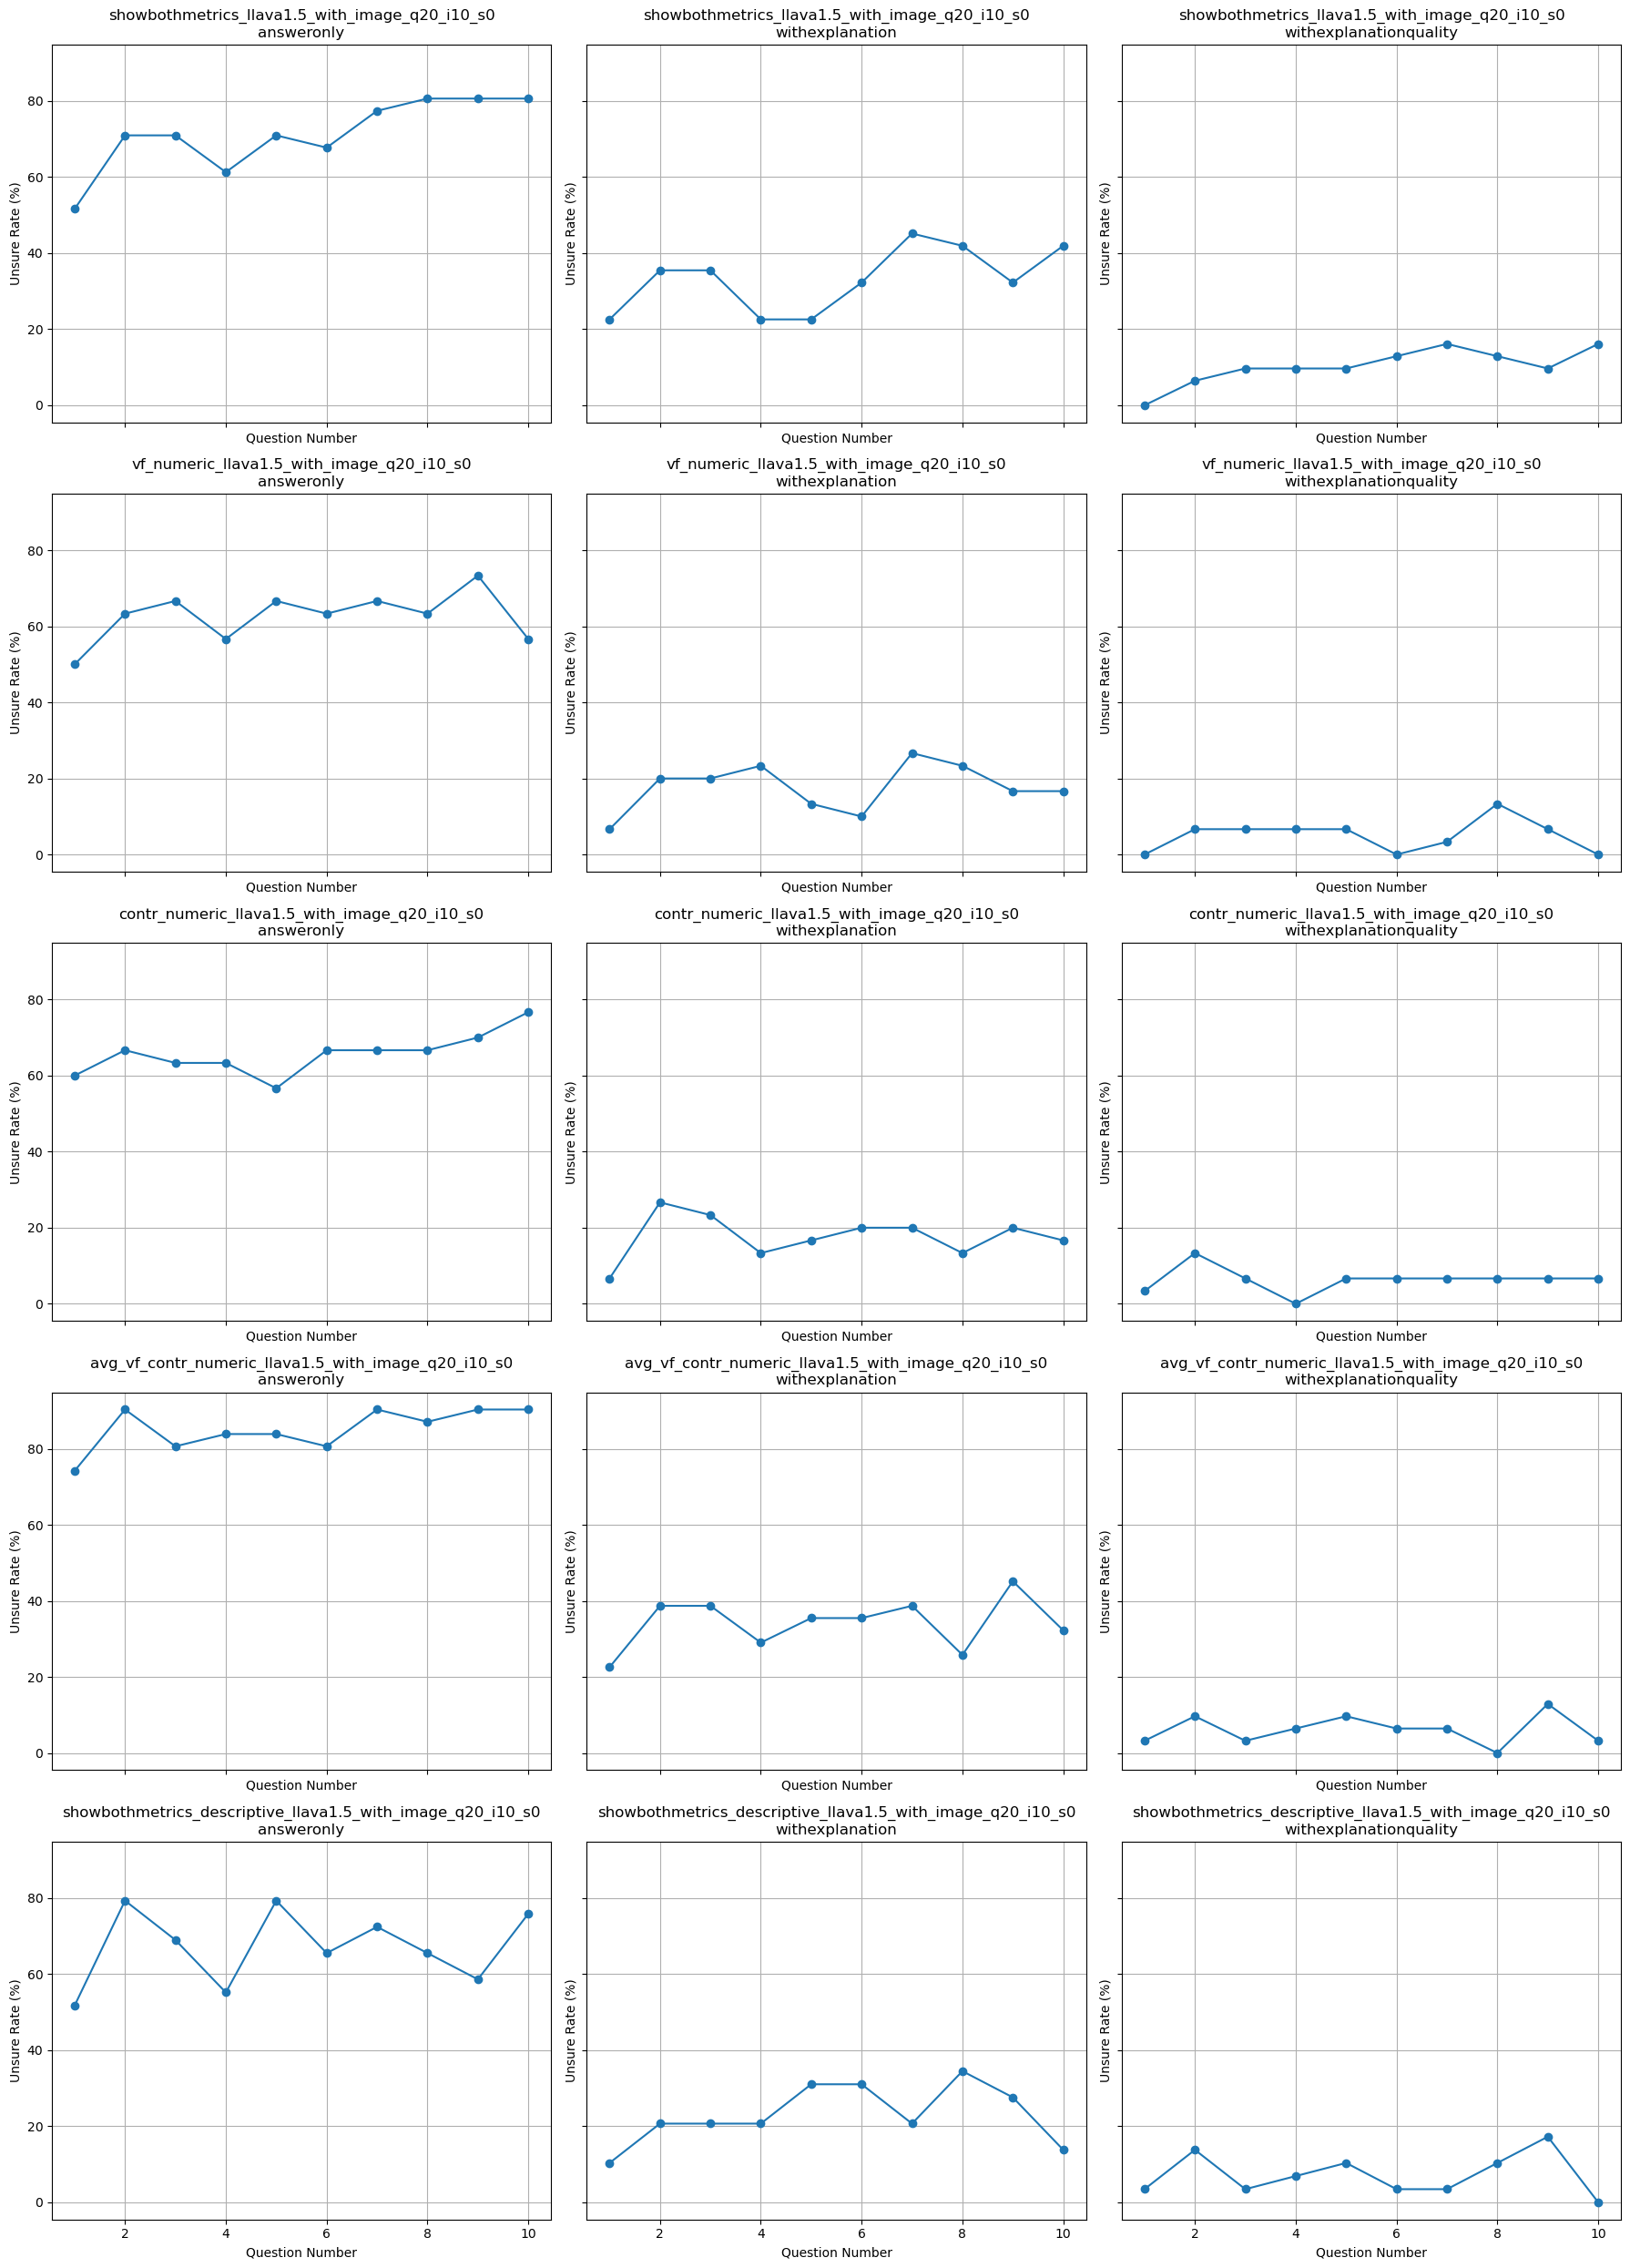

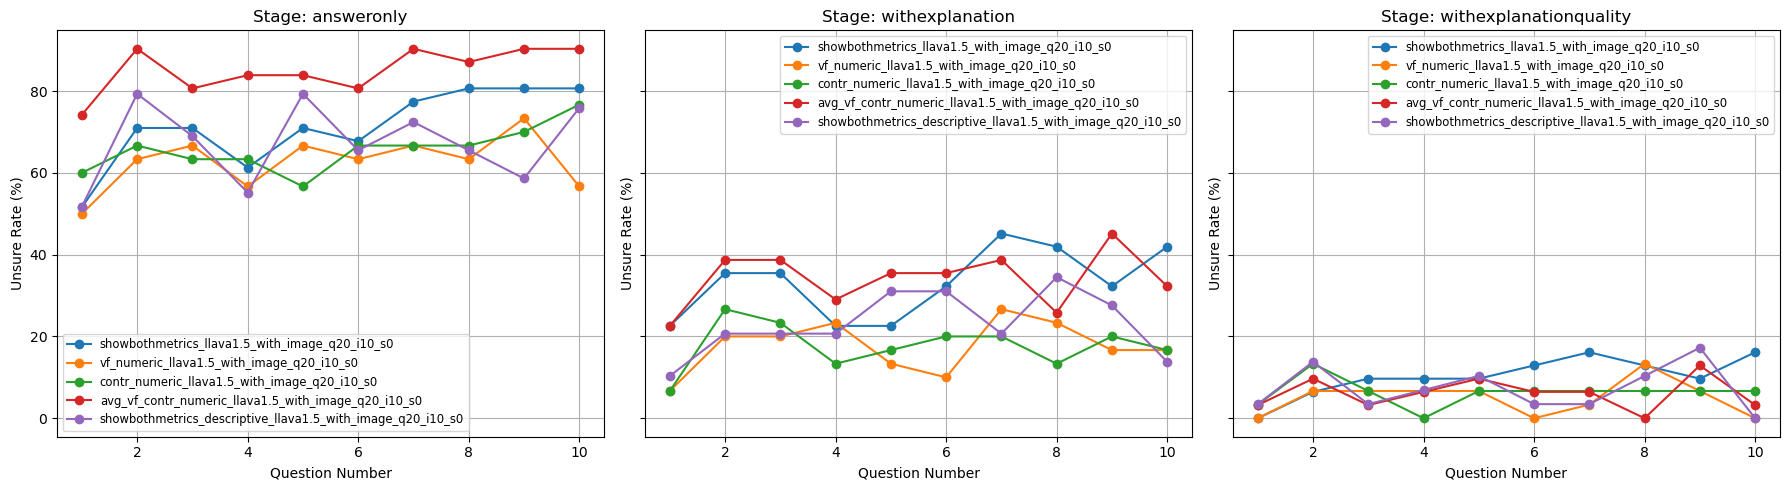

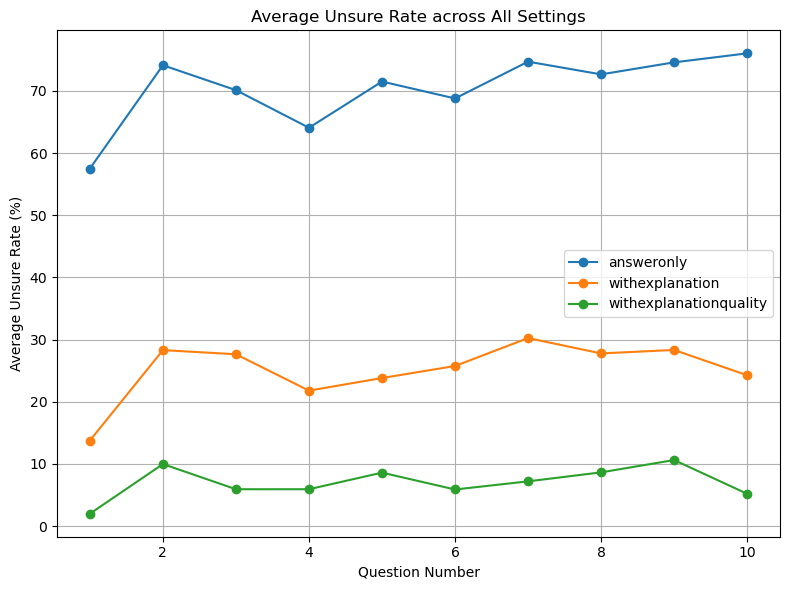

In [3]:
# Group by setting, stage, and question index to compute average unsure rate.
grouped = df.groupby(['setting', 'stage', 'question_idx'])['is_unsure'].mean().reset_index()
# Convert the unsure rate to percentage.
grouped['unsure_rate_percent'] = grouped['is_unsure'] * 100

print("\nGrouped average unsure rates (first few rows):")
print(grouped.head())

# Create a 6x3 grid plot: rows correspond to settings, columns correspond to stages.
fig, axes = plt.subplots(nrows=len(settings), ncols=3, figsize=(18, 25), sharex=True, sharey=True)

for i, setting in enumerate(settings):
    for j, stage in enumerate(stages):
        ax = axes[i, j]
        # Filter data for the current setting and stage.
        df_subset = grouped[(grouped['setting'] == setting) & (grouped['stage'] == stage)]
        ax.plot(df_subset['question_idx'], df_subset['unsure_rate_percent'], marker='o')
        ax.set_title(f"{setting}\n{stage}")
        ax.set_xlabel("Question Number")
        ax.set_ylabel("Unsure Rate (%)")
        ax.grid(True)

plt.tight_layout()
plt.show()

# --- All 6 settings in one graph (per stage) ---
# Create a new figure with 3 subplots (one for each stage) and plot all settings on each.
fig, axes = plt.subplots(nrows=1, ncols=3, figsize=(18, 5), sharey=True)

for j, stage in enumerate(stages):
    ax = axes[j]
    for setting in settings:
        df_subset = grouped[(grouped['setting'] == setting) & (grouped['stage'] == stage)]
        ax.plot(df_subset['question_idx'], df_subset['unsure_rate_percent'], marker='o', label=setting)
    ax.set_title(f"Stage: {stage}")
    ax.set_xlabel("Question Number")
    ax.set_ylabel("Unsure Rate (%)")
    ax.legend(fontsize='small', loc='best')
    ax.grid(True)

plt.tight_layout()
plt.show()

# --- Average across all settings ---
# First, compute the average unsure rate across all settings for each stage and question index.
avg_grouped = grouped.groupby(['stage', 'question_idx'])['unsure_rate_percent'].mean().reset_index()

# Plot the average across settings for each stage in one graph.
plt.figure(figsize=(8, 6))
for stage in stages:
    df_stage_avg = avg_grouped[avg_grouped['stage'] == stage]
    plt.plot(df_stage_avg['question_idx'], df_stage_avg['unsure_rate_percent'], marker='o', label=stage)
plt.xlabel("Question Number")
plt.ylabel("Average Unsure Rate (%)")
plt.title("Average Unsure Rate across All Settings")
plt.legend(loc='best')
plt.grid(True)
plt.tight_layout()
plt.show()


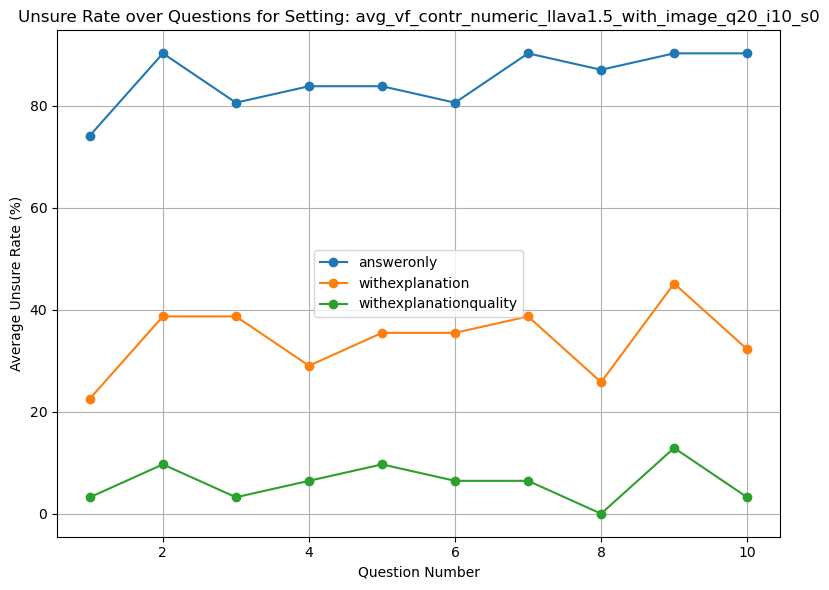

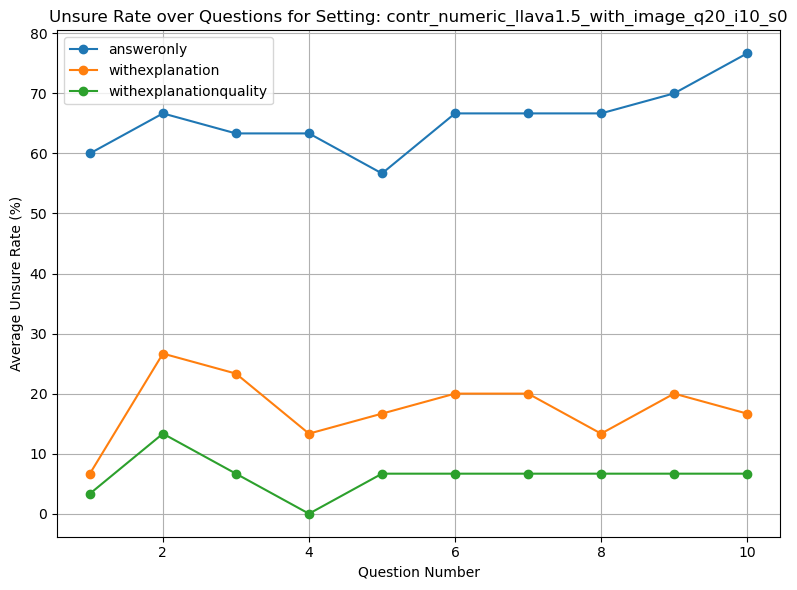

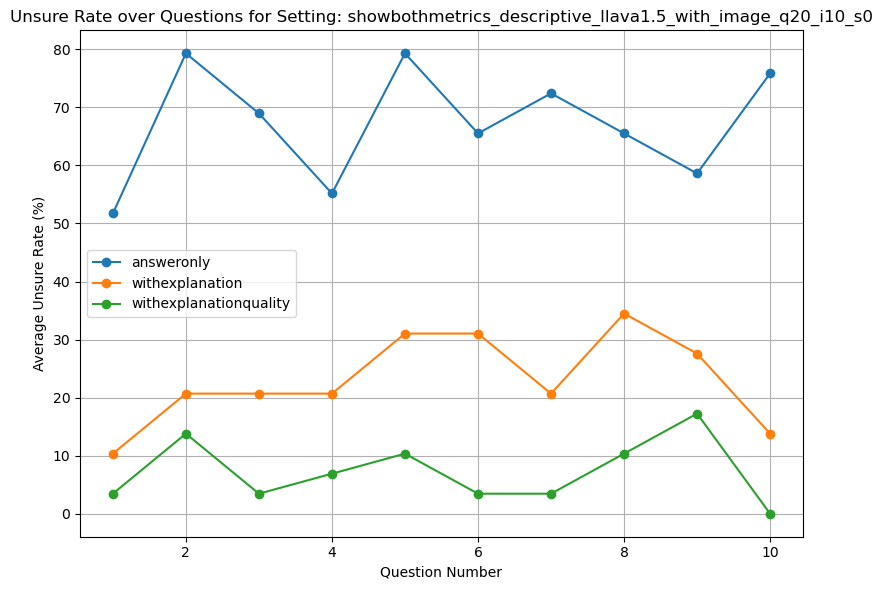

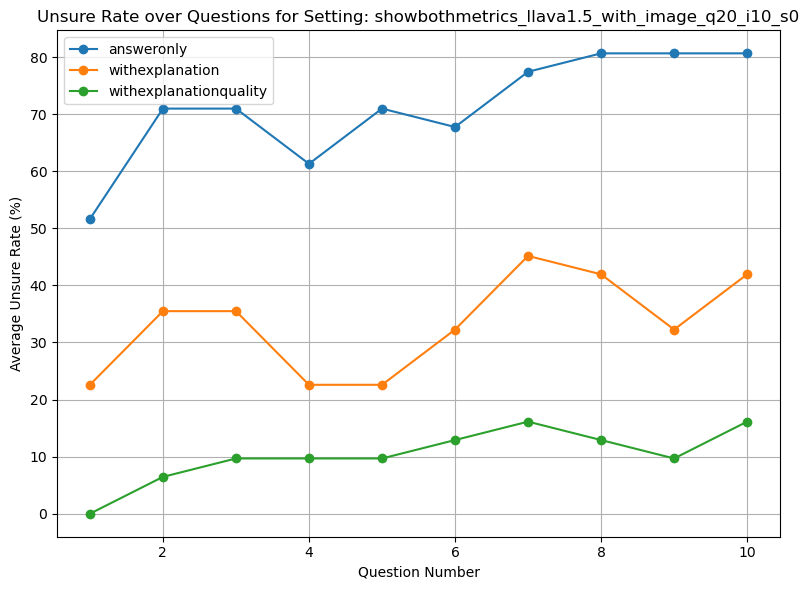

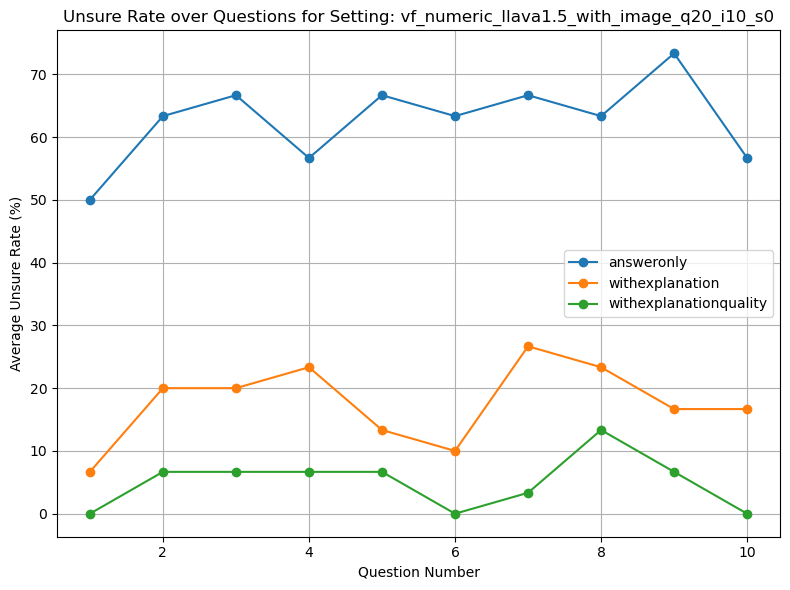

In [4]:
# Now plot separate graphs for each setting.
unique_settings = grouped['setting'].unique()

for setting in unique_settings:
    # Filter data for the current setting.
    df_setting = grouped[grouped['setting'] == setting]
    
    plt.figure(figsize=(8, 6))
    # Plot one line per stage.
    for stage in stages:
        df_stage = df_setting[df_setting['stage'] == stage]
        plt.plot(df_stage['question_idx'], df_stage['unsure_rate_percent'], 
                 marker='o', label=stage)
    
    plt.xlabel("Question Number")
    plt.ylabel("Average Unsure Rate (%)")
    plt.title(f"Unsure Rate over Questions for Setting: {setting}")
    plt.legend(loc='best')
    plt.grid(True)
    plt.tight_layout()
    plt.show()